# Custom Datasets

In [1]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get data

Data is a subset of Food-101 (3 classes and only 10% of images).

In [3]:
import requests
import zipfile
from pathlib import Path

# setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if image folder doesn't exist, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists, skipping download")
else:
  print(f"{image_path} doesn't exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download dataset
with open(data_path / "pizza_stak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)
  print("Writing contents to pizza_stak_sushi.zip")

# unzip data
with zipfile.ZipFile(data_path / "pizza_stak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data to image path")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi doesn't exist, creating one...
Writing contents to pizza_stak_sushi.zip
Unzipping pizza, steak and sushi data to image path


## 2. Data preparation and exploration

In [6]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path, returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [8]:
# setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualizing an image
1. Get all image paths
2. Pick a random image path
3. Get image class name using `pathlib.Path.parent.stem`
4. Open the image with Python's Pillow (PIL)
5. Show image and print metadata

Random image path: data/pizza_steak_sushi/test/pizza/2236338.jpg
Image clas: pizza
Image height: 512
Image width: 512


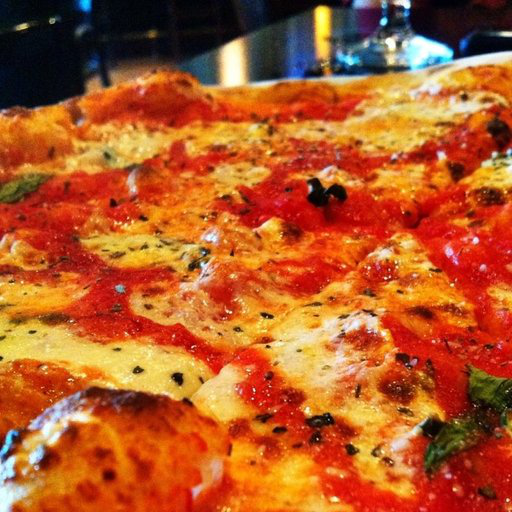

In [11]:
import random
from PIL import Image

random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image clas: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img